In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [8]:
tf.test.is_built_with_cuda()

True

In [9]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [10]:
x_train.shape[0]

50000

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [14]:
#plotting the image in the dataset using matplotlib
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

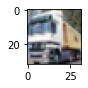

In [16]:
plot_sample(1)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
classes[y_train[1][0]]

'truck'

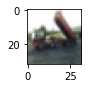

In [21]:
plot_sample(2)

In [22]:
classes[y_train[2][0]]

'truck'

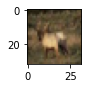

In [23]:
plot_sample(3)

In [24]:
classes[y_train[3][0]]

'deer'

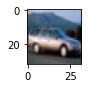

In [25]:
plot_sample(4)

In [26]:
classes[y_train[4][0]]

'automobile'

In [27]:
#preprocessing scale image
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [28]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [29]:
x_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [32]:
#converting discrete values to 2-D array where 1 will be assigned to position of number in array and rest zero
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)

In [33]:
y_train_categorical[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
#it's the dicrete vlaue and above is array for this discrete value
y_train[[4]]

array([[1]], dtype=uint8)

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
#we use sparse_categorical_crossentropy for discrete data but we converted it into 2-D array so loss function categorical_crossentropy will work
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 122s 78ms/step - loss: 1.8588 - accuracy: 0.3345
Epoch 2/2
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6544 - accuracy: 0.4142


In [52]:
#Measuring training time on a cpu
with tf.device('/CPU:0'):
    cpu_model = model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

ValueError: The first argument to `Layer.call` must always be passed.